In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
subjCols = ['Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)']
raceCols = ['Percent Black', 'Percent White', 'Percent Asian', 'Percent Hispanic']
neededCols = [raceCols[:1][0], 'Average Score (SAT Math)']
scores = pd.read_csv('scores.csv')
scores.drop(scores.columns.difference(subjCols + raceCols), 1, inplace=True)
for col in neededCols:
                scores = scores[pd.notnull(scores[col])]
for index, row in scores.iterrows():
    for col in raceCols:
            scores.at[index, col] = float(row[col].strip('%'))
            
for col in raceCols:
        scores[col] = scores[col].apply(pd.to_numeric, errors="coerce")


In [8]:
def plot_corr(df, size=10):
    corr = df.corr()
    fix, ax = plt.subplots(figsize=(size, size))
    ax.set_xticks(np.arange(5)) # center x ticks
    ax.set_yticks(np.arange(5)) # center y ticks
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns)
    ax.matshow(corr, cmap="Blues")     
    plt.tight_layout()
    plt.savefig('matrix.svg', format="svg")

Percent White                  float64
Percent Black                  float64
Percent Hispanic               float64
Percent Asian                  float64
Average Score (SAT Math)       float64
Average Score (SAT Reading)    float64
Average Score (SAT Writing)    float64
dtype: object

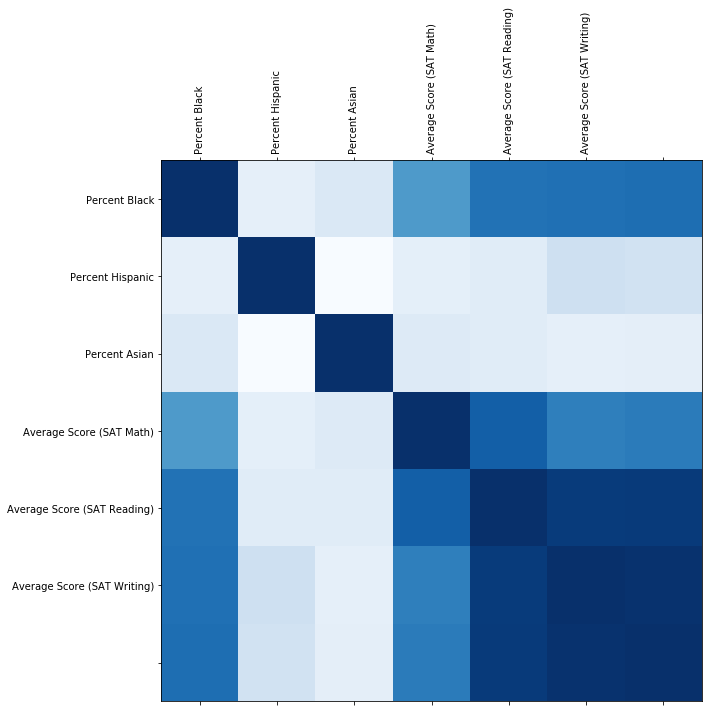

In [9]:
plot_corr(scores)
scores.dtypes

In [10]:
print(scores)

     Percent White  Percent Black  Percent Hispanic  Percent Asian  \
2             28.6           13.3              18.0           38.5   
3             11.7           38.5              41.3            5.9   
4              3.1           28.2              56.9            8.6   
5              1.7            3.1               5.5           88.9   
6              3.9           24.4              56.6           13.2   
7             45.3           17.2              18.7           17.1   
8              2.7           41.9              49.2            5.8   
9              2.5           39.9              51.2            5.8   
10             3.3           25.0              41.1           29.9   
11             3.9           30.8              56.9            5.9   
12             1.9           28.1              45.4           13.7   
13             7.3           18.9              50.9           22.4   
14             5.7           20.4              40.3           31.1   
17             9.9  

In [11]:
scores.index = range(len(scores))

In [12]:
print(scores)

     Percent White  Percent Black  Percent Hispanic  Percent Asian  \
0             28.6           13.3              18.0           38.5   
1             11.7           38.5              41.3            5.9   
2              3.1           28.2              56.9            8.6   
3              1.7            3.1               5.5           88.9   
4              3.9           24.4              56.6           13.2   
5             45.3           17.2              18.7           17.1   
6              2.7           41.9              49.2            5.8   
7              2.5           39.9              51.2            5.8   
8              3.3           25.0              41.1           29.9   
9              3.9           30.8              56.9            5.9   
10             1.9           28.1              45.4           13.7   
11             7.3           18.9              50.9           22.4   
12             5.7           20.4              40.3           31.1   
13             9.9  